## Problem 5: IKP with MLP
---
### Part 1: Generating data points
Using FKP equations we generate a dataset of size $20^3 = 8000$.
$$
x =    L_1 \cos (\theta_1) + L_2 \cos (\theta_1 + \theta_2) + L_3 \cos (\theta_1 + \theta_2 + \theta_3) \\
    y =    L_1 \sin (\theta_1) + L_2 \sin (\theta_1 + \theta_2) + L_3 \sin (\theta_1 + \theta_2 + \theta_3) \\
    \phi = \theta_1 + \theta_2 + \theta_3
$$

In [ ]:
import csv
from numpy import random, sin, cos, pi

# Generate 20 random values between -π and π
th1 = random.uniform(-pi, pi, 8000)
th2 = random.uniform(-pi, pi, 8000)
th3 = random.uniform(-pi, pi, 8000)

l1, l2, l3 = 17, 19, 23
x = lambda t1, t2, t3: l1*cos(t1) + l2*cos(t1+t2) + l3*cos(t1+t2+t3)
y = lambda t1, t2, t3: l1*sin(t1) + l2*sin(t1+t2) + l3*sin(t1+t2+t3)
phi= lambda t1, t2, t3: t1+t2+t3

X = [x(t1, t2, t3) for t1, t2, t3 in zip(th1, th2, th3)]
Y = [y(t1, t2, t3) for t1, t2, t3 in zip(th1, th2, th3)]
PHI = [phi(t1, t2, t3) for t1, t2, t3 in zip(th1, th2, th3)]

# Show the generated data once
print(X)
print(Y)
print(PHI)

# Writing the dataset into a csv file
rows = zip(th1, th2, th3, X, Y, PHI)

with open('prob5.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['th1', 'th2', 'th3', 'X', 'Y', 'PHI'])  # Optional header
    writer.writerows(rows)

### Part 2: Creating a neural network model

In [70]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

In [72]:
# Clear any previous session to ensure a clean state
tf.keras.backend.clear_session()

# Load the CSV file
data = pd.read_csv('prob5.csv') 

X = data[['X', 'Y', 'PHI']].values  # Input features
y = data[['th1', 'th2', 'th3']].values  # Output targets

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(50, input_dim=3, activation='relu'))    # First hidden layer with 50 neurons, 3 inputs and ReLU activation
model.add(Dense(50, activation='relu')) # Second hidden layer with 50 neurons and ReLU activation
model.add(Dense(3, activation='linear'))    # Output layer with 3 neurons and linear activation

# Print the model summary to verify the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                200       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 2903 (11.34 KB)
Trainable params: 2903 (11.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Part 3: Training and evaluating the model

In [ ]:
# Compile the model with SGD optimizer and MSE loss function
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=200, batch_size=80, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

### Part 4: Plotting the obtained results

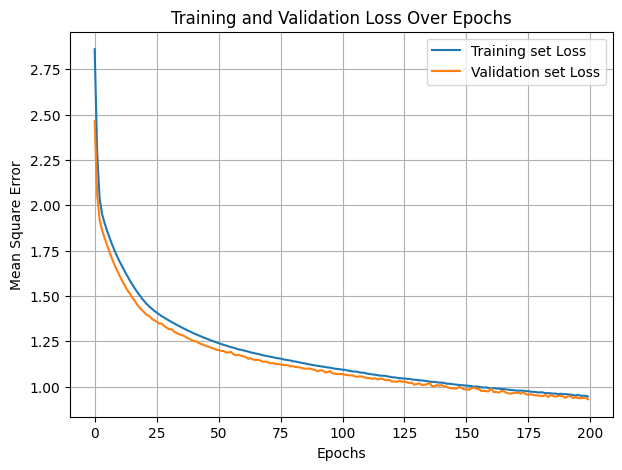

50/50 [==============================] - 0s 3ms/step


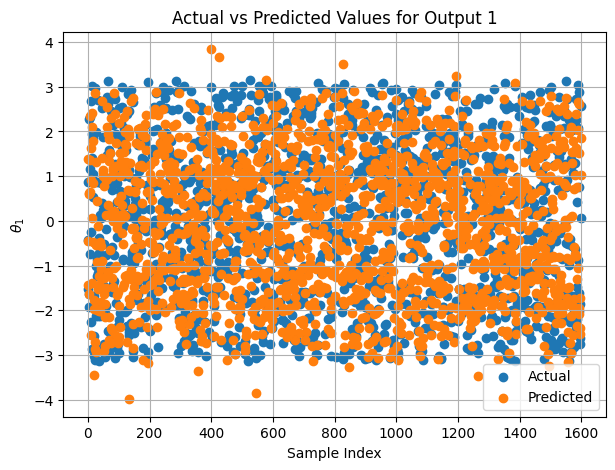

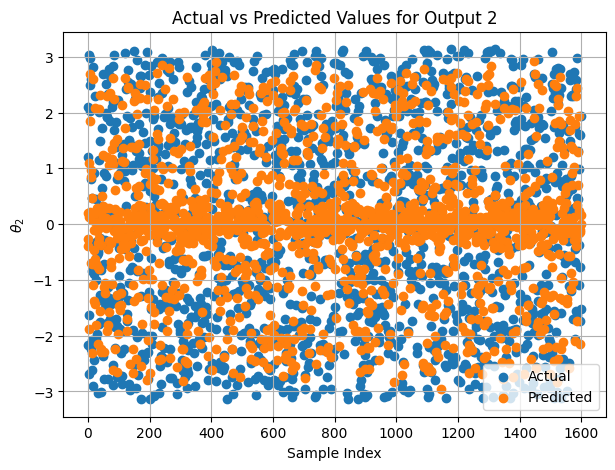

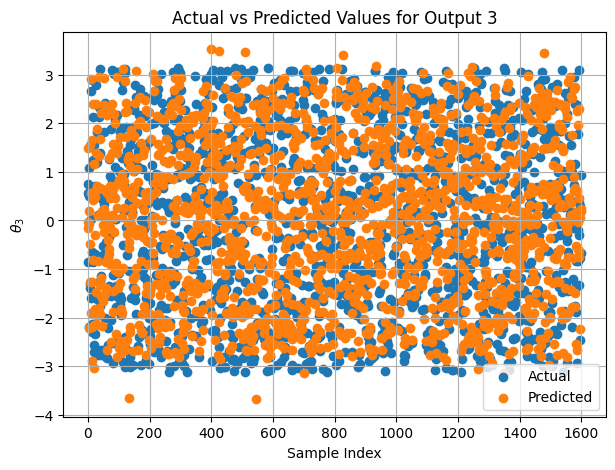

In [74]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'], label='Training set Loss')
plt.plot(history.history['val_loss'], label='Validation set Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the predicted vs actual outputs for each output dimension
for i in range(3):
    plt.figure(figsize=(7, 5))
    plt.scatter(range(len(y_test)), y_test[:, i], label='Actual', alpha=1)
    plt.scatter(range(len(y_test)), y_pred[:, i], label='Predicted', alpha=1)
    plt.xlabel('Sample Index')
    plt.ylabel(fr'$\theta_{i+1}$')
    plt.title(f'Actual vs Predicted Values for Output {i+1}')
    plt.legend()
    plt.grid(True)
    plt.show()


### Part 5: Comparison with analytical solution

From Homework 4, we had:
$$

     \theta_1 = \frac{\pi}{4} + \frac{\pi}{9} \sin\left(\frac{\pi}{5} t\right)     \\[10pt]
     \theta_2 = \frac{\pi}{6} + \frac{\pi}{18} \cos\left(\frac{\pi}{10} t\right)   \\[10pt]
     \theta_3 = - \frac{\pi}{9} - \frac{\pi}{36} \sin\left(\frac{\pi}{15} t\right)

$$
$$
x =    L_1 \cos (\theta_1) + L_2 \cos (\theta_1 + \theta_2) + L_3 \cos (\theta_1 + \theta_2 + \theta_3) \\
    y =    L_1 \sin (\theta_1) + L_2 \sin (\theta_1 + \theta_2) + L_3 \sin (\theta_1 + \theta_2 + \theta_3) \\
    \phi = \theta_1 + \theta_2 + \theta_3
$$ 

<span style="color:green; font-size:22px; font-weight:bold;">Analytical result:</span>
At time step $t = 0$ we'll get:
$$
\theta_1 = \frac{\pi}{4} = 0.78540 \hspace{25pt}
\theta_2 = \frac{\pi}{6} + \frac{\pi}{18} = 0.69813 \hspace{25pt}
\theta_3 = - \frac{\pi}{9} = -0.34907 
$$

<br>

<span style="color:green; font-size:22px; font-weight:bold;">Neural network result:</span>
Once again knowing the relations between the joint-space and work-space variables from homework 4, we can calculate the inputs of the neural network model at this moment as:
$$
x = 17 \cos (\frac{\pi}{4}) + 19 \cos (\frac{\pi}{4} + \frac{\pi}{6} + \frac{\pi}{18}) + 23 \cos (\frac{\pi}{4} + \frac{\pi}{6} + \frac{\pi}{18}- \frac{\pi}{9}) = 23.3970 \, cm \\[10pt]
    y =    17 \sin (\frac{\pi}{4}) + 19 \sin (\frac{\pi}{4} + \frac{\pi}{6} + \frac{\pi}{18}) + 23 \sin (\frac{\pi}{4} + \frac{\pi}{6} + \frac{\pi}{18}- \frac{\pi}{9}) = 51.7936 \, cm \\[10pt]
    \phi = \frac{\pi}{4} + \frac{\pi}{6} + \frac{\pi}{18}- \frac{\pi}{9} = 65^\circ = 1.1345 \, rad
$$
<br>

Now the network result can be found like:

In [75]:
y_true = [0.78540, 0.69813, -0.34907]   # th1, th2 and th3 at t = 0
X0 = [23.3970, 51.7936, 1.1345]         # x, y and phi at t = 0
X0 = scaler.transform([X0])             # Normalize the input
Y0 = model.predict([X0]).flatten()      # Model's prediction

print(f'Predicted thetas at t:0 = {Y0}')
print(f'Actual thetas at t:0 \t= {np.array(y_true)}')

error = 0
for i in range(3):
    error += (y_true[i] - Y0[i])**2
error /= 3

print(f'Mean Square Error for the test sample at t:0 = {error:.6f}')

1/1 [==============================] - 0s 316ms/step
Predicted thetas at t:0 = [ 1.2475674   0.1718376  -0.17899337]
Actual thetas at t:0 	= [ 0.7854   0.69813 -0.34907]
Mean Square Error for the test sample at t:0 = 0.173169
